<a href="https://colab.research.google.com/github/miprecia/MOVING-AVERAGE-PROJECTS/blob/main/ARIMA_MODELING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# python finance basics

In [2]:
import pandas as pd
import yfinance as yf

In [3]:
start = "2015-01-01"
end = "2024-01-01"
stock = "AAPL"

df = yf.download(stock, start=start, end=end)

/tmp/ipython-input-4054216993.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [4]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.237551,24.705320,23.798600,24.694235,212818400
2015-01-05,23.554747,24.086807,23.368526,24.006998,257142000
2015-01-06,23.556957,23.816336,23.195599,23.619031,263188400
2015-01-07,23.887283,23.987044,23.654506,23.765352,160423600
2015-01-08,24.805079,24.862719,24.097882,24.215380,237458000
...,...,...,...,...,...
2023-12-22,191.788773,193.581837,191.164662,193.353978,37149600
2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300


In [5]:
df2 = df["Volume"]
df2

Ticker,AAPL
Date,
2015-01-02,212818400
2015-01-05,257142000
2015-01-06,263188400
2015-01-07,160423600
2015-01-08,237458000
...,...
2023-12-22,37149600
2023-12-26,28919300
2023-12-27,48087700


In [6]:
high_open =df[df["Open"] >= 80]
high_open

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-12-22,191.788773,193.581837,191.164662,193.353978,37149600.0
2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300.0


# ARIMA ( Auto Regressive Moving Averages)

Modeling on finanacial data*

In [7]:
# importing dependencies (libaries)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = df.copy()
df.isnull().values.any()
df = df.dropna()

df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.237551,24.705320,23.798600,24.694235,212818400
2015-01-05,23.554747,24.086807,23.368526,24.006998,257142000
2015-01-06,23.556957,23.816336,23.195599,23.619031,263188400
2015-01-07,23.887283,23.987044,23.654506,23.765352,160423600
2015-01-08,24.805079,24.862719,24.097882,24.215380,237458000


In [9]:
# 1-day lag plot

import plotly.graph_objects as go


# making a copy of the data set
data = df.copy()

# Correctly access MultiIndex columns for 'Close' and create 'Lagged Close'
data[('Lagged Close', 'AAPL')] = data[('Close', 'AAPL')].shift(1)

fig = go.Figure(data=go.Scatter(x=data[('Close', 'AAPL')], y=data[('Lagged Close', 'AAPL')], mode="markers"))

fig.update_layout(
    title=f"Lag Plot of {stock} Closing Prices with a 1-Day Lag",
    xaxis_title="Todays Close",
    yaxis_title="Previous Days Close",
    template="plotly_dark"

)

fig.show()

In [10]:
# 5-day lag plot

import plotly.graph_objects as go


# making a copy of the data set
data = df.copy()

# Correctly access MultiIndex columns for 'Close' and create 'Lagged Close'
data[('Lagged Close', 'AAPL')] = data[('Close', 'AAPL')].shift(5)

fig = go.Figure(data=go.Scatter(x=data[('Close', 'AAPL')], y=data[('Lagged Close', 'AAPL')], mode="markers"))

fig.update_layout(
    title=f"Lag Plot of {stock} Closing Prices with a 5-Day Lag",
    xaxis_title="Todays Close",
    yaxis_title="Previous Days Close",
    template="plotly_dark"

)

fig.show()

In [11]:
# train & testing data

train_data = df.iloc[0:int(len(data)*0.8),:]
test_data = df.iloc[int(len(data)*0.8):,:]


In [12]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=train_data.index, y=train_data["Open","AAPL"], mode="lines", name="Training Data", line=dict(color="purple")))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data["Open","AAPL"], mode="lines", name="Testing Data", line=dict(color="green")))

fig.update_layout(
    title=f"{stock} Open Prices, Training and Testing Data",
    xaxis_title="Dates",
    yaxis_title="Open Prices",
    template="plotly_dark"
)
fig.show()

In [13]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=train_data.index, y=train_data["Close","AAPL"], mode="lines", name="Training Data", line=dict(color="red")))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data["Close","AAPL"], mode="lines", name="Testing Data", line=dict(color="green")))

fig.update_layout(
    title=f"{stock} Close Prices, Training and Testing Data",
    xaxis_title="Dates",
    yaxis_title="Close Prices",
    template="plotly_dark"
)
fig.show()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

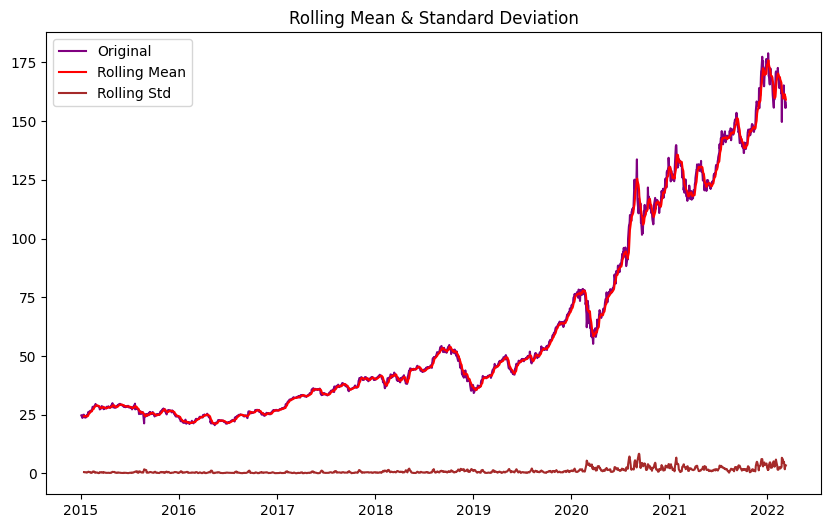

In [14]:
window = 7
# Correctly extract the 'Open' column as a Series
train_series = train_data[('Open', 'AAPL')]

#determining the rolling statistics
rolmean = train_series.rolling(window).mean()
rolstd = train_series.rolling(window).std()

#plot rolling statistics
fig = plt.figure(figsize=(10,6))
orig = plt.plot(train_series, color="purple", label="Original")
mean = plt.plot(rolmean, color= "red", label="Rolling Mean")
std = plt.plot(rolstd, color="brown", label = "Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation")

In [15]:
!pip install statsmodels
from statsmodels.tsa.stattools import adfuller
window = 7
# Correctly extract the 'Close' column as a Series
train_series = train_data[('Close', 'AAPL')]

dftest = adfuller(train_series, autolag="AIC")
dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
for key,value in dftest[4].items():
  dfoutput["Critical Value (%s)"%key] = value
dfoutput

,0
Test Statistic,0.660885
p-value,0.989024
#Lags Used,20.000000
Number of Observations Used,1790.000000
Critical Value (1%),-3.434008
Critical Value (5%),-2.863156
Critical Value (10%),-2.567630


In [16]:
#Calculating the difference btw the consecutive elements and dropping any NaN Values(BECAUSE OUR P-VALUE IS > THAN 0.5)

train_diff = train_series.diff(periods=1)
train_diff = train_diff.dropna(inplace = False)

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

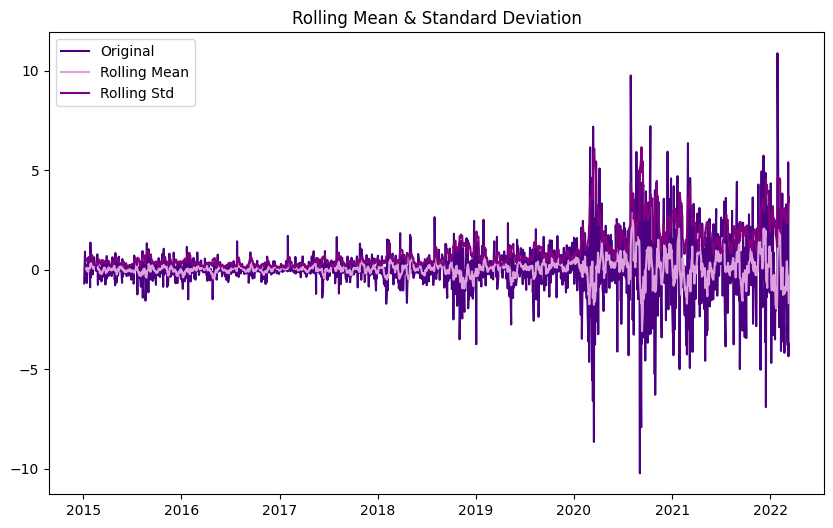

In [17]:
window = 7

#determining the rolling statistics
rolmean = train_diff.rolling(window).mean()
rolstd = train_diff.rolling(window).std()

#plot rolling statistics
fig = plt.figure(figsize=(10,6))
orig = plt.plot(train_diff, color="indigo", label="Original")
mean = plt.plot(rolmean, color= "plum", label="Rolling Mean")
std = plt.plot(rolstd, color="purple", label = "Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation")

In [18]:
dftest = adfuller(train_diff, autolag="AIC")
dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
for key,value in dftest[4].items():
  dfoutput["Critical Value (%s)"%key] = value
dfoutput

,0
Test Statistic,-8.908917e+00
p-value,1.118054e-14
#Lags Used,1.900000e+01
Number of Observations Used,1.790000e+03
Critical Value (1%),-3.434008e+00
Critical Value (5%),-2.863156e+00
Critical Value (10%),-2.567630e+00


In [19]:
def smape_kun(y_true, y_pred, epsilon=1e-8):
  # Calculating the denominator to avoid division by zero
  denominator = (np.abs(y_pred) + np.abs(y_true)) + epsilon

  # Computing the absolute percentage error with symmetric scaling
  absolute_percentage_error = np.abs(y_pred - y_true) * 200 / denominator

  # Calculating the mean of the symmetric absolute percentage errors
  mean_smape = np.mean(absolute_percentage_error)

  return mean_smape

In [20]:
test_series = test_data["Close"]
test_diff = test_series.diff(periods=1)
test_diff = test_diff.dropna(inplace = False)

#Modeling


In [21]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd # Ensure pandas is imported for DataFrame/Series type checks

# Define the correct MultiIndex column name for 'Close'
CLOSE_COL = ('Close', 'AAPL')

# --- Start of additions to ensure train_diff_numerical and test_diff are defined ---
# Correctly access the 'Close' column from the MultiIndex DataFrame for training
train_series_numerical = train_data[CLOSE_COL]
train_diff_numerical = train_series_numerical.diff(periods=1).dropna()

# Re-create test_series and test_diff from test_data
# Correctly access the 'Close' column from the MultiIndex DataFrame
test_series = test_data[CLOSE_COL]
test_diff = test_series.diff(periods=1).dropna()
# --- End of additions ---

# initializing the history with our training data as a list of numerical values
history = train_diff_numerical.tolist()
predictions = list()

#Iterating through the test data points
for t in range(len(test_diff)): # test_diff is now a Series of numerical values
  p, d, q =5, 1, 0
  model = ARIMA(history, order=(p, d, q))
  model_fit = model.fit()

  output = model_fit.forecast() # output is a Series, take the first element
  yhat = output[0]
  predictions.append(yhat)

  obs = test_diff.iloc[t] # Correctly access element by integer position from the Series
  history.append(obs)

  if t % 100 == 0:
    print("Test Series Point : {}\tPredicted={}, Expected={}". format(t, yhat, obs))


#Calculating the Mean Squared Error (MSE) to evaluate the model perfomance
mse = mean_squared_error(test_diff, predictions) # test_diff is now a Series of values
print("Mean Squared Error (MSE):", mse)


Test Series Point : 0	Predicted=-2.0908159395517516, Expected=4.3836822509765625
Test Series Point : 100	Predicted=1.1039564930532455, Expected=-0.4720611572265625
Test Series Point : 200	Predicted=-0.6680417684679574, Expected=3.5169525146484375
Test Series Point : 300	Predicted=0.1484477508997495, Expected=0.2766265869140625
Test Series Point : 400	Predicted=0.2101623949856748, Expected=-1.5532684326171875
Mean Squared Error (MSE): 8.96513133900639


In [22]:
#calculating the cummulative sum

reverse_test_diff = np.r_[test_series.iloc[0], test_diff].cumsum()
reverse_predictions = np.r_[test_series.iloc[0], predictions].cumsum()
reverse_test_diff.shape, reverse_predictions.shape

((453,), (453,))

In [23]:
# calculating the error

error = mean_squared_error(reverse_test_diff, reverse_predictions)
error_smape = smape_kun(reverse_test_diff, reverse_predictions)

print("Testing MSE: %.3f" % error)
print("Testing SMAPE %.3f" % error_smape)

Testing MSE: 68.081
Testing SMAPE 4.685


In [24]:
# taking the reverse_test_diff and reverse_predictions, converting them to a panda series, setting their indicies to an qwexisting time series

reverse_test_diff_series = pd.Series(reverse_test_diff)
reverse_test_diff_series.index = test_series.index

reverse_predictions_series = pd.Series(reverse_test_diff)
reverse_predictions_series.index = test_series.index


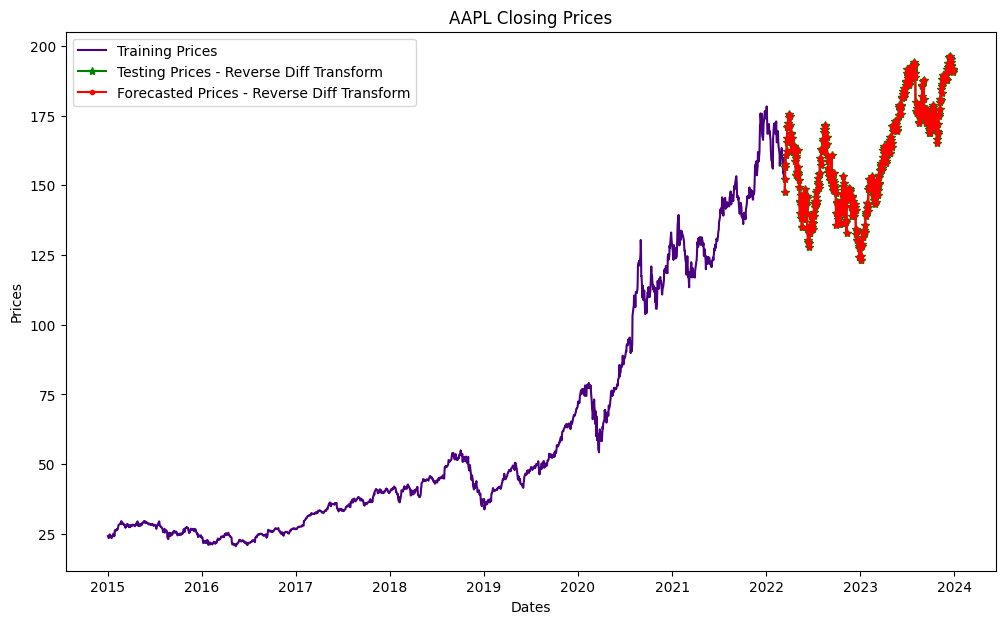

In [25]:
#plotting

plt.figure(figsize=(12,7))
plt.title("AAPL Closing Prices")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.plot(train_series, color="indigo", label="Training Prices")
plt.plot(reverse_test_diff_series, color="green", marker="*", label="Testing Prices - Reverse Diff Transform")
plt.plot(reverse_test_diff_series, color="red", marker=".", label="Forecasted Prices - Reverse Diff Transform")
plt.legend();


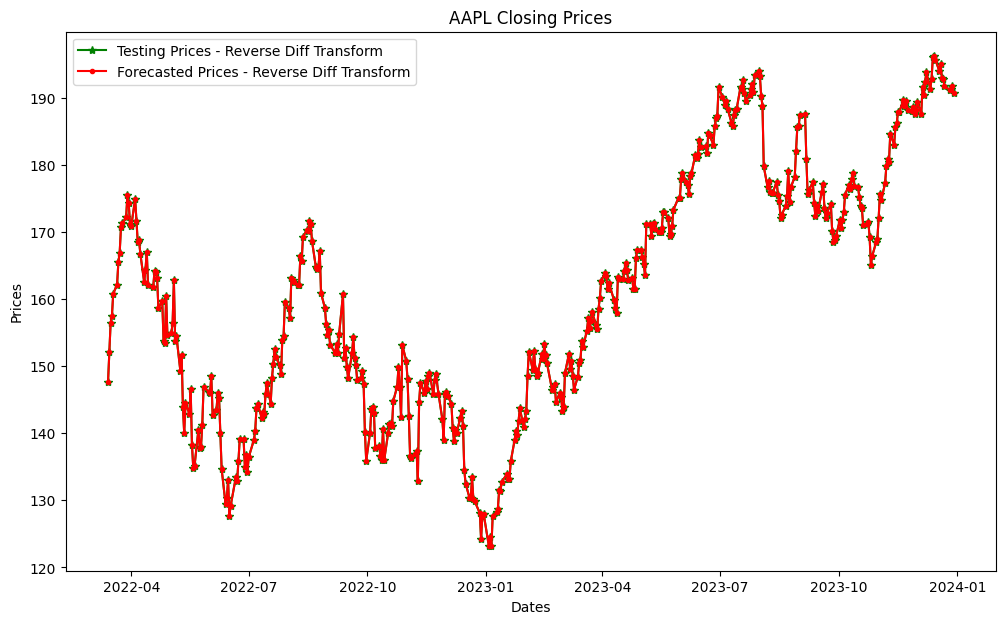

In [26]:
plt.figure(figsize=(12,7))
plt.title("AAPL Closing Prices")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.plot(reverse_test_diff_series, color="green", marker="*", label="Testing Prices - Reverse Diff Transform")
plt.plot(reverse_test_diff_series, color="red", marker=".", label="Forecasted Prices - Reverse Diff Transform")
plt.legend();